In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [9]:
data=pd.read_csv('monthly_milk_production.csv')
data.head(6)


,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
5,1962-06,697


In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

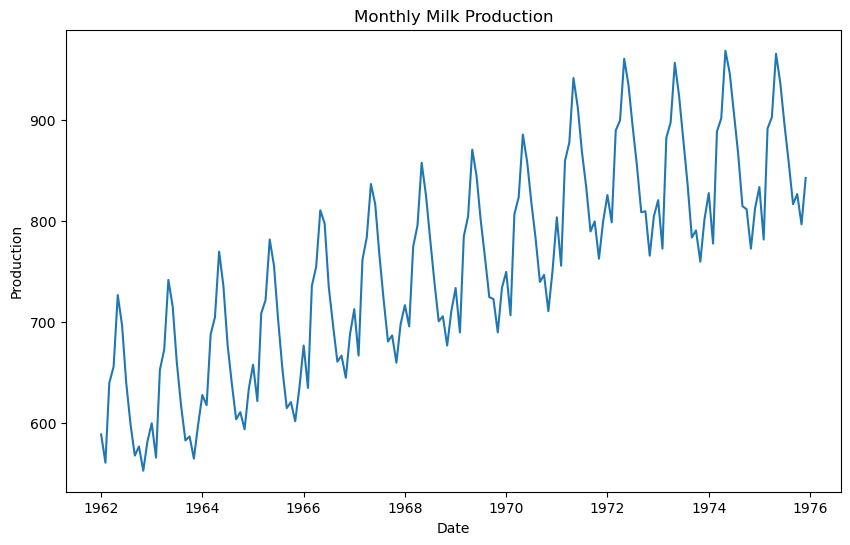

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Monthly Milk Production')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [8]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [12]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 10  
x_train, y_train = create_sequences(train, sequence_length)

x_test, y_test = create_sequences(test, sequence_length)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [16]:
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
124/124 [==============================] - 4s 5ms/step - loss: 0.0421
Epoch 2/100
124/124 [==============================] - 1s 6ms/step - loss: 0.0181
Epoch 3/100
124/124 [==============================] - 1s 7ms/step - loss: 0.0119
Epoch 4/100
124/124 [==============================] - 1s 6ms/step - loss: 0.0094
Epoch 5/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0078
Epoch 6/100
124/124 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 7/100
124/124 [==============================] - 1s 5ms/step - loss: 0.0068
Epoch 8/100
124/124 [==============================] - 1s 5ms/step - loss: 0.0066
Epoch 9/100
124/124 [==============================] - 1s 4ms/step - loss: 0.0063
Epoch 10/100
124/124 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 11/100
124/124 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 12/100
124/124 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 13/100


124/124 [==============================] - 1s 6ms/step - loss: 0.0014
Epoch 100/100
124/124 [==============================] - 1s 5ms/step - loss: 0.0014


In [19]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

1/1 [==============================] - 0s 36ms/step


In [20]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [21]:
train_score = np.sqrt(np.mean(np.power((y_train - train_predict), 2)))
print(f"Train RMSE: {train_score:.2f}")

Train RMSE: 126.04


In [22]:
test_score = np.sqrt(np.mean(np.power((y_test - test_predict), 2)))
print(f"Test RMSE: {test_score:.2f}")

Test RMSE: 81.35
